### Описание датасета

Датасет предоставляет обширную информацию о финансовом поведении клиентов, включая их доходы,
кредитную историю, типы кредитов, поведение при оплате и кредитный рейтинг.

### Подключение модулей

In [890]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Загрузка данных

In [892]:
df = pd.read_csv('train.csv')

In [656]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Опиисание данных

- ID Уникальный идентификатор для каждой записи.
- Customer_ID Уникальный идентификатор для каждого клиента.
- Month Месяц совершения транзакции или записи.
- Name Имя клиента.
- Age Возраст клиента.
- SSN Номер социального страхования клиента.
- Occupation Профессия клиента.
- Annual_Income Годовой доход клиента.
- Monthly_Inhand_Salary Ежемесячная зарплата клиента на дому.
- Num_Bank_Accounts Общее количество банковских счетов, принадлежащих клиенту.
- Num_Credit_Card Общее количество кредитных карт, имеющихся у клиента.
- Interest_Rate Процентная ставка, применяемая к займам или кредитам.
- Num_of_Loan Количество займов, взятых клиентом.
- Type_of_Loan Категории займов, полученных клиентом.
- Delay_from_due_date Задержка платежа по отношению к сроку оплаты.
- Num_of_Delayed_Payment  Общее количество случаев просрочки платежей, произведенных клиентом.
- Changed_Credit_Limit Внесены изменения в кредитный лимит клиента.
- Num_Credit_Inquiries Количество запросов, направленных в отношении кредита клиента.
- Credit_Mix Разнообразие типов кредитов, которые использует клиент (например, займы, кредитные карты).
- Outstanding_Debt Общая сумма задолженности клиента на текущий момент.
- Credit_Utilization_Ratio Доля использованного кредита по сравнению с общим кредитным лимитом.
- Credit_History_Age Продолжительность кредитной истории клиента.
- Payment_of_Min_Amount Указывает, выплачивает ли клиент минимальную требуемую сумму каждый месяц.
- Total_EMI_per_month Общая сумма ежемесячных платежей, выплачиваемых клиентом.
- Amount_invested_monthly Сумма ежемесячных инвестиций, осуществляемых клиентом.
- Payment_Behaviour Платежные привычки и склонности клиента.
- Monthly_Balance Остаток средств на счете клиента на конец каждого месяца.
- Credit_Score Кредитный рейтинг клиента (целевая переменная: "Хороший", "Плохой", "Стандартный").

In [410]:

# Количество данных 
df.shape

(100000, 28)

### Предобработка данных

In [412]:
# информация о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [414]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Есть аномальные значения и пустые значения

In [416]:
# выводим типы данных
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

Некоторые типы данных не соответствуют

In [418]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке ID = 0
Кол-во пропусков в колонке Customer_ID = 0
Кол-во пропусков в колонке Month = 0
Кол-во пропусков в колонке Name = 9985
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке SSN = 0
Кол-во пропусков в колонке Occupation = 0
Кол-во пропусков в колонке Annual_Income = 0
Кол-во пропусков в колонке Monthly_Inhand_Salary = 15002
Кол-во пропусков в колонке Num_Bank_Accounts = 0
Кол-во пропусков в колонке Num_Credit_Card = 0
Кол-во пропусков в колонке Interest_Rate = 0
Кол-во пропусков в колонке Num_of_Loan = 0
Кол-во пропусков в колонке Type_of_Loan = 11408
Кол-во пропусков в колонке Delay_from_due_date = 0
Кол-во пропусков в колонке Num_of_Delayed_Payment = 7002
Кол-во пропусков в колонке Changed_Credit_Limit = 0
Кол-во пропусков в колонке Num_Credit_Inquiries = 1965
Кол-во пропусков в колонке Credit_Mix = 0
Кол-во пропусков в колонке Outstanding_Debt = 0
Кол-во пропусков в колонке Credit_Utilization_Ratio = 0
Кол-во пропусков в колонке Credit_Histor

In [420]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [422]:
# Проверка на дублирование записей
df.duplicated().sum()

0

### Вывод

Есть пропущенные, аномальные значения. Дубликатов не обнаружено

### Отчистка данных

In [894]:
# Преобразование столбцов в числовые типы данных
numeric_columns = ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
                   'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
                   'Delay_from_due_date', 'Num_of_Delayed_Payment', 
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 
                   'Monthly_Balance']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [428]:
# выводим типы данных
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [896]:
# Удаление строк с недопустимыми значениями в столбце 'Age'
df = df[df['Age'] != -500]

In [898]:
# удаляем отрицательные значения 
df = df.loc[df['Age'] >= 18]

In [900]:
# удалим слишком большой возраст
df = df.loc[df['Age'] <= 96]

In [436]:
df['Age'].value_counts()

Age
38.0    2833
28.0    2829
31.0    2806
26.0    2792
32.0    2749
25.0    2737
36.0    2720
35.0    2716
34.0    2707
27.0    2707
39.0    2705
44.0    2688
19.0    2650
22.0    2641
41.0    2638
37.0    2605
43.0    2605
20.0    2603
30.0    2602
21.0    2594
29.0    2575
24.0    2553
23.0    2537
45.0    2501
40.0    2477
42.0    2441
33.0    2429
18.0    2270
46.0    1538
48.0    1330
49.0    1307
55.0    1299
53.0    1287
52.0    1283
54.0    1236
51.0    1224
50.0    1205
47.0    1165
56.0     348
95.0       3
Name: count, dtype: int64

In [438]:
# проверка на отсутствующие значения для всех колонок датафрейма
df['Age'].isnull().sum()

0

In [902]:
# заменим пустые значения имени на -.
df['Name'].fillna('-', inplace=True)

# Проверка результата
df['Name'].value_counts().head(20)

Name
-                     8706
Langep                  42
Jessicad                39
Stevex                  39
Jessica Wohlt           37
Deepa Seetharamanm      37
Danielz                 36
Kimj                    35
Jonesb                  35
Vaughanl                35
Nicko                   35
Lucia Mutikanip         35
Michaelr                34
Strupczewskid           34
Ryan Vlastelicad        34
Valetkevitchv           33
Phila                   33
Ronald Groverk          33
env                     32
Andreaj                 31
Name: count, dtype: int64

In [904]:
# Заменим пустые значения на новое значения No Loan
df['Type_of_Loan'].fillna('No Loan', inplace=True)
df['Type_of_Loan'].value_counts().head(20)

Type_of_Loan
No Loan                                     10355
Not Specified                                1283
Credit-Builder Loan                          1167
Personal Loan                                1167
Debt Consolidation Loan                      1159
Student Loan                                 1139
Payday Loan                                  1084
Mortgage Loan                                1077
Auto Loan                                    1060
Home Equity Loan                             1009
Personal Loan, and Student Loan               294
Mortgage Loan, and Home Equity Loan           249
Not Specified, and Payday Loan                241
Credit-Builder Loan, and Not Specified        232
Student Loan, and Payday Loan                 228
Payday Loan, and Debt Consolidation Loan      226
Student Loan, and Credit-Builder Loan         223
Payday Loan, and Student Loan                 215
Payday Loan, and Personal Loan                213
Mortgage Loan, and Not Specified     

In [906]:
med_Monthly_Inhand_Salary = df['Monthly_Inhand_Salary'].median() # рассчитываем медиану
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(med_Monthly_Inhand_Salary) 

In [908]:
# Удаление строк с пропущенными значениями в колонке 'Num_of_Delayed_Payment'
df.dropna(subset=['Num_of_Delayed_Payment'], inplace=True)

In [448]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 3758
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1637
Num_Credit_Inquiries        1539
Credit_Mix                     0
Outstanding_Debt             800
Credit_Utilization_Ratio       0
Credit_History_Age          7079
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     6898
Payment_Behaviour              0
Monthly_Balance              917
Credit_Score                   0
dtype: int64

In [910]:
df['Num_of_Loan'].fillna(0, inplace=True)

In [912]:
df['Num_of_Loan'].isnull().sum()

0

In [914]:
# Заменим пустые значения на новое значения No Changed
df['Changed_Credit_Limit'].fillna(0, inplace=True)
df['Changed_Credit_Limit'].value_counts().head(20)

Changed_Credit_Limit
0.00     1641
8.22      116
11.32     107
10.06     105
7.35      100
11.50     100
11.49      98
8.23       95
8.99       91
7.33       91
3.93       89
7.64       87
9.88       87
7.69       86
11.73      85
7.23       84
8.54       84
10.54      83
8.30       83
8.76       81
Name: count, dtype: int64

In [916]:
med_Num_Credit_Inquiries = df['Num_Credit_Inquiries'].median() # рассчитываем медиану
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(med_Num_Credit_Inquiries) 

In [918]:
med_Outstanding_Debt = df['Outstanding_Debt'].median() # рассчитываем медиану
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(med_Outstanding_Debt)

In [919]:
# Список колонок, в которых нужно заменить пропущенные значения на самые популярные
columns_to_fill = ['Credit_History_Age']

# Замена пропущенных значений на самые популярные в указанных колонках
for column in columns_to_fill:
    most_frequent_value = df[column].value_counts().idxmax()
    df[column].fillna(most_frequent_value, inplace=True)

# Проверка результата
print(df[columns_to_fill].head())

      Credit_History_Age
0  22 Years and 1 Months
3  22 Years and 4 Months
5  22 Years and 6 Months
7  19 Years and 5 Months
9  26 Years and 8 Months


In [922]:
df['Amount_invested_monthly'].value_counts().head(20)

Amount_invested_monthly
0.000000      115
80.415295       1
160.663824      1
434.335365      1
249.020652      1
100.928120      1
50.307421       1
123.339404      1
79.705859       1
59.476467       1
132.962276      1
86.481173       1
127.715902      1
38.288162       1
106.613084      1
111.108914      1
519.120768      1
70.814691       1
77.291937       1
153.374452      1
Name: count, dtype: int64

In [924]:
# Нахождение самого популярного значения в колонке 'Amount_invested_monthly'
most_frequent_value_amount = df['Amount_invested_monthly'].value_counts().idxmax()

# Замена пропущенных значений на самое популярное значение
df['Amount_invested_monthly'].fillna(most_frequent_value_amount, inplace=True)

In [926]:
median_value_monthly_balance = df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(median_value_monthly_balance, inplace=True)

In [927]:
# удаляем отрицательные значения 
df = df.loc[df['Num_Bank_Accounts'] > 0]

In [930]:
# удаляем отрицательные значения 
df = df.loc[df['Delay_from_due_date'] > 0]

In [932]:
# Удаление строк с пропущенными значениями в колонке 'Num_of_Delayed_Payment'
df.dropna(subset=['Num_of_Delayed_Payment'], inplace=True)

In [933]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df = df[(df['Num_of_Loan'] >= 0) & (df['Num_of_Loan'] <= 10)]
df['Num_of_Loan'].head(20)

0     4.0
3     4.0
5     4.0
7     4.0
9     1.0
10    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    3.0
17    3.0
18    3.0
19    3.0
20    3.0
22    3.0
23    3.0
25    1.0
26    1.0
27    1.0
Name: Num_of_Loan, dtype: float64

In [936]:
# удаляем отрицательные значения 
df = df.loc[df['Changed_Credit_Limit'] > 0]

In [938]:
# удаляем отрицательные значения 
df = df.loc[df['Num_of_Delayed_Payment'] > 0]

In [940]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [942]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,66429,66429,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,66429,11176,CUS_0x228d,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,66429,8,August,8372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,66429,9255,-,6662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,66429.0,NaN,NaN,NaN,34.109922,9.979754,18.0,26.0,34.0,42.0,95.0
SSN,66429,11169,#F%$D@*&8,3723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,66429,16,_______,4677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,66429,15679,40341.16,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,66429.0,NaN,NaN,NaN,3968.850789,2901.228128,303.645417,1763.386667,3136.363333,5280.946608,15204.633333
Num_Bank_Accounts,66429.0,NaN,NaN,NaN,18.24259,121.590107,1.0,4.0,6.0,8.0,1798.0


In [478]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке ID = 0
Кол-во пропусков в колонке Customer_ID = 0
Кол-во пропусков в колонке Month = 0
Кол-во пропусков в колонке Name = 0
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке SSN = 0
Кол-во пропусков в колонке Occupation = 0
Кол-во пропусков в колонке Annual_Income = 0
Кол-во пропусков в колонке Monthly_Inhand_Salary = 0
Кол-во пропусков в колонке Num_Bank_Accounts = 0
Кол-во пропусков в колонке Num_Credit_Card = 0
Кол-во пропусков в колонке Interest_Rate = 0
Кол-во пропусков в колонке Num_of_Loan = 0
Кол-во пропусков в колонке Type_of_Loan = 0
Кол-во пропусков в колонке Delay_from_due_date = 0
Кол-во пропусков в колонке Num_of_Delayed_Payment = 0
Кол-во пропусков в колонке Changed_Credit_Limit = 0
Кол-во пропусков в колонке Num_Credit_Inquiries = 0
Кол-во пропусков в колонке Credit_Mix = 0
Кол-во пропусков в колонке Outstanding_Debt = 0
Кол-во пропусков в колонке Credit_Utilization_Ratio = 0
Кол-во пропусков в колонке Credit_History_Age = 0
Кол-во 

### Вывод

Избавились от пустых значений

In [944]:
#посмотрим уникальные значения занятости
df['Occupation'].unique()

array(['Scientist', 'Teacher', '_______', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect',
       'Journalist'], dtype=object)

In [946]:
df['Occupation'].value_counts()

Occupation
_______          4677
Lawyer           4362
Architect        4233
Scientist        4212
Mechanic         4208
Engineer         4180
Accountant       4179
Journalist       4112
Teacher          4111
Developer        4094
Musician         4063
Media_Manager    4061
Doctor           4041
Entrepreneur     3996
Manager          3953
Writer           3947
Name: count, dtype: int64

In [948]:
df['Occupation']=df['Occupation'].replace('_______', 'No Occupation')
df['Occupation'].value_counts()

Occupation
No Occupation    4677
Lawyer           4362
Architect        4233
Scientist        4212
Mechanic         4208
Engineer         4180
Accountant       4179
Journalist       4112
Teacher          4111
Developer        4094
Musician         4063
Media_Manager    4061
Doctor           4041
Entrepreneur     3996
Manager          3953
Writer           3947
Name: count, dtype: int64

In [950]:
df.describe(include=[object])

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,66429,66429,66429,66429,66429,66429,66429,66429,66429,66429,66429,66429,66429
unique,66429,11176,8,9255,11169,16,15679,5695,4,404,3,7,3
top,0x1602,CUS_0x228d,August,-,#F%$D@*&8,No Occupation,40341.16,No Loan,Standard,19 Years and 5 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,8372,6662,3723,4677,13,7250,26262,6323,36629,17115,36448


In [952]:
df['Amount_invested_monthly'].value_counts()

Amount_invested_monthly
0.000000      5900
80.415295        1
44.611359        1
119.764204       1
145.015755       1
              ... 
37.112169        1
436.509837       1
273.180766       1
269.977595       1
167.163865       1
Name: count, Length: 60530, dtype: int64

In [954]:
df['Payment_Behaviour'].value_counts().head(20)

Payment_Behaviour
Low_spent_Small_value_payments      17115
High_spent_Medium_value_payments    11624
Low_spent_Medium_value_payments      9204
High_spent_Large_value_payments      9027
High_spent_Small_value_payments      7538
Low_spent_Large_value_payments       6929
!@9#%8                               4992
Name: count, dtype: int64

In [956]:
#Замена на "Unknown"
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

In [958]:
df['Payment_Behaviour'].value_counts().head(20)

Payment_Behaviour
Low_spent_Small_value_payments      17115
High_spent_Medium_value_payments    11624
Low_spent_Medium_value_payments      9204
High_spent_Large_value_payments      9027
High_spent_Small_value_payments      7538
Low_spent_Large_value_payments       6929
Unknown                              4992
Name: count, dtype: int64

### Вывод

Избавились от некорректных значений

In [563]:
df.hist(figsize = (15,10), bins = 50);

### Визуализация

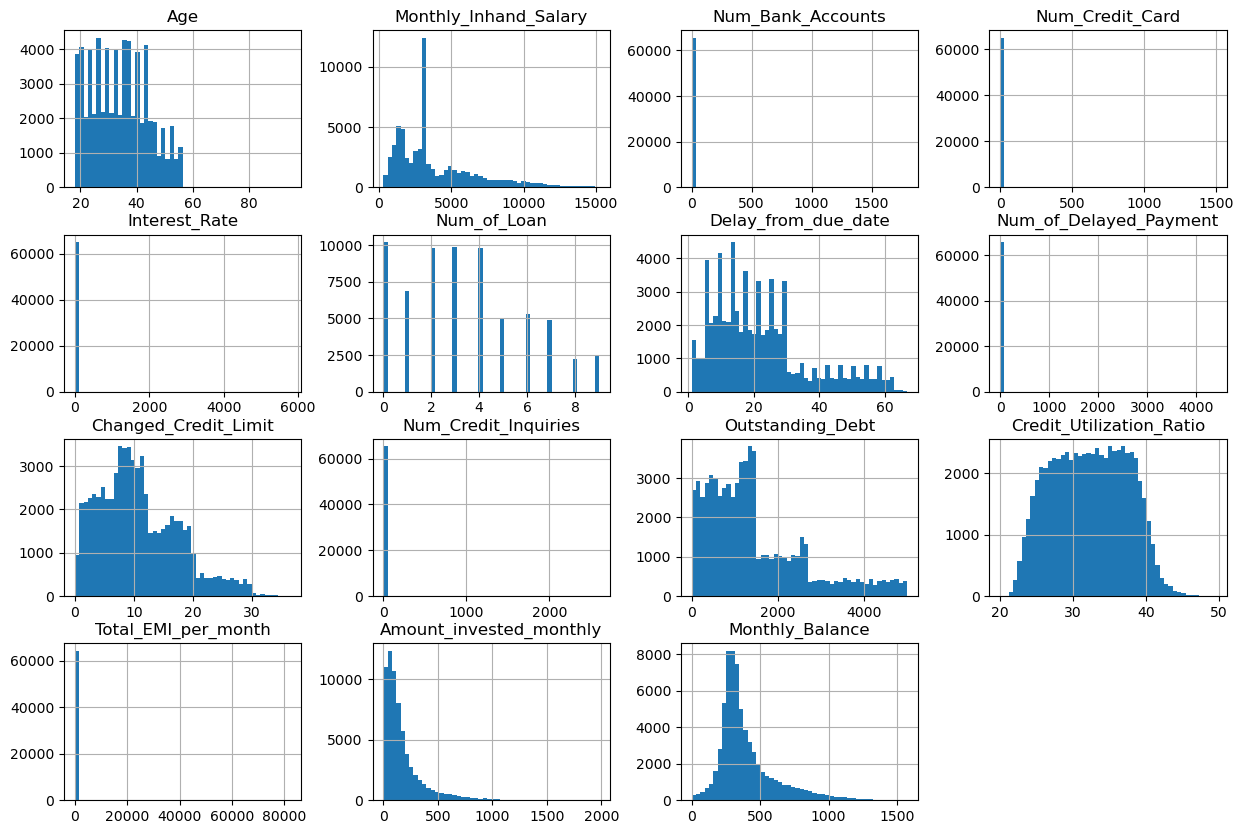

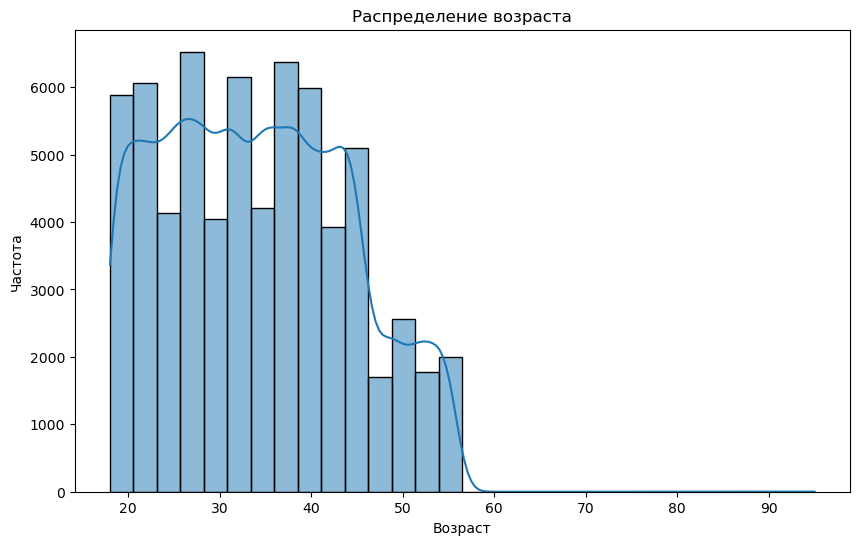

In [564]:
# Распределение возраста
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

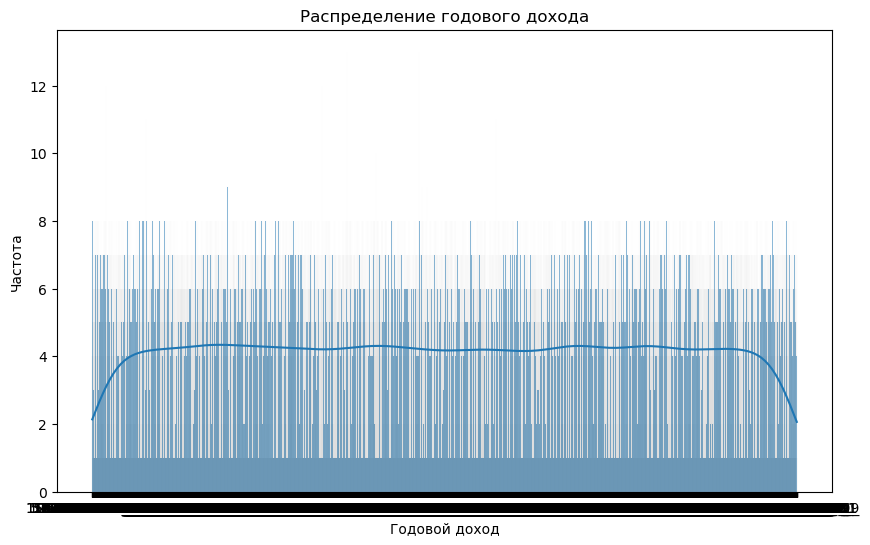

In [565]:
# Распределение годового дохода
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Income'], bins=30, kde=True)
plt.title('Распределение годового дохода')
plt.xlabel('Годовой доход')
plt.ylabel('Частота')
plt.show()

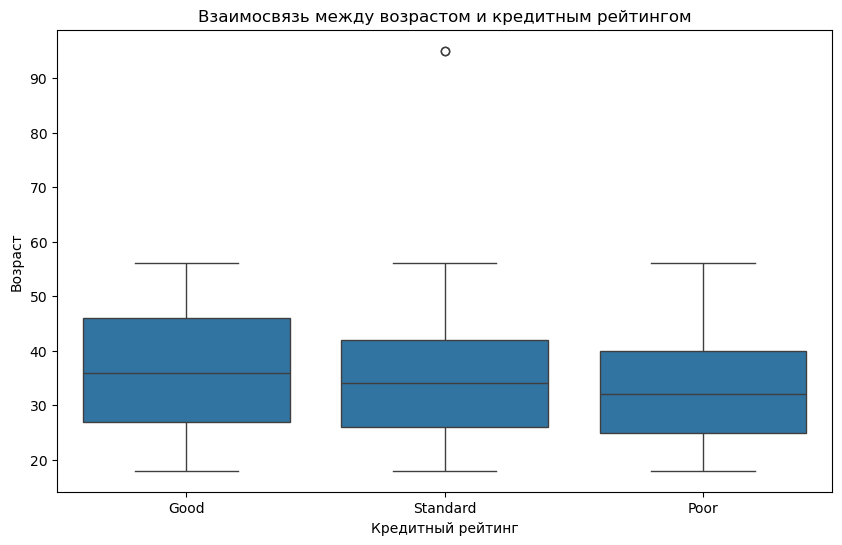

In [567]:
# Взаимосвязь между возрастом и кредитным рейтингом
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Age', data=df)
plt.title('Взаимосвязь между возрастом и кредитным рейтингом')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Возраст')
plt.show()

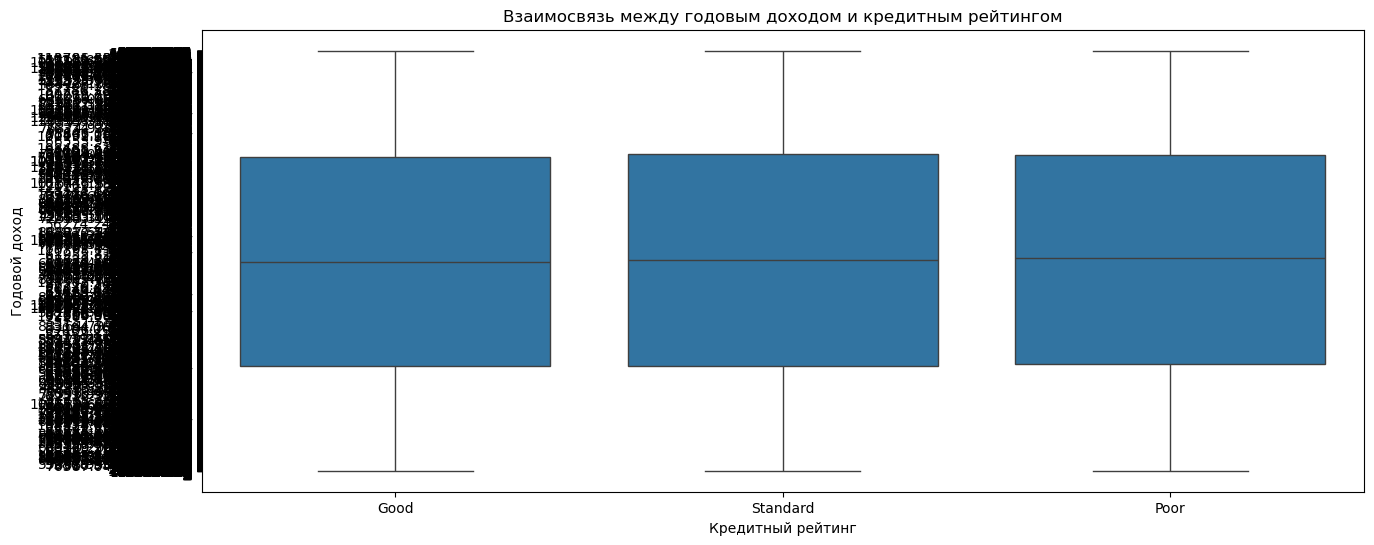

In [568]:
# Взаимосвязь между годовым доходом и кредитным рейтингом
plt.figure(figsize=(15, 6))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df)
plt.title('Взаимосвязь между годовым доходом и кредитным рейтингом')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Годовой доход')
plt.show()

### Выявление выбросов

In [960]:
numeric_columns = ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
                   'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
                   'Delay_from_due_date', 'Num_of_Delayed_Payment', 
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 
                   'Monthly_Balance']

df[numeric_columns].describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000,66429.000000
mean,34.109922,3968.850789,18.242590,22.665011,73.317467,3.407352,21.861025,32.230788,10.779183,27.107769,1448.564754,32.269948,1404.500249,175.393639,397.298559
std,9.979754,2901.228128,121.590107,129.306201,470.299112,2.511823,14.596226,230.722554,6.676461,189.102037,1163.104745,5.110092,8297.200317,194.502129,208.442157
min,18.000000,303.645417,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,0.000000,0.340000,20.000000,0.000000,0.000000,0.007760
25%,26.000000,1763.386667,4.000000,4.000000,8.000000,1.000000,11.000000,10.000000,5.750000,3.000000,583.600000,28.048630,30.687932,57.488665,269.759321
50%,34.000000,3136.363333,6.000000,6.000000,15.000000,3.000000,19.000000,14.000000,9.700000,6.000000,1171.730000,32.302437,68.896136,115.042580,335.979949
75%,42.000000,5280.946608,8.000000,7.000000,21.000000,5.000000,28.000000,19.000000,15.300000,9.000000,1980.000000,36.486750,160.255399,215.874981,461.877800
max,95.000000,15204.633333,1798.000000,1499.000000,5797.000000,9.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,49.564519,82331.000000,1977.326102,1576.288935


### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [962]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Embarked
Credit_Score_cols = pd.get_dummies(df["Credit_Score"], dtype = int)
Credit_Score_cols.head()

,Good,Poor,Standard
0,1,0,0
3,1,0,0
5,1,0,0
7,0,0,1
9,1,0,0


### Формирование дата-сета для обучения моделей

In [964]:
X = pd.concat([df[numeric_columns], Credit_Score_cols], axis = 1)

In [966]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df["Credit_Score"]

In [972]:

from sklearn.model_selection import train_test_split
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[numeric_columns]], axis=1)
X.shape

(66429, 15)

In [976]:
credit_score_mapping = {'Standard': 1, 'Poor': 2, 'Good': 3}
df_encoded['Credit_Score'] = df_encoded['Credit_Score'].replace(credit_score_mapping)

In [978]:
X

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
3,23.0,3136.363333,3,4,3,4.0,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310
5,23.0,3136.363333,3,4,3,4.0,8,4.0,9.27,4.0,809.98,27.262259,49.574949,62.430172,340.479212
7,23.0,1824.843333,3,4,3,4.0,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168
9,28.0,3037.986667,2,4,6,1.0,7,1.0,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,3359.415833,4,6,7,2.0,20,6.0,9.50,3.0,502.38,39.323569,35.104023,140.581403,410.256158
99995,25.0,3359.415833,4,6,7,2.0,23,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.866228
99996,25.0,3359.415833,4,6,7,2.0,18,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.651610
99997,25.0,3359.415833,4,6,5729,2.0,27,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.809083


### KNeighborsClassifier (Классификация ближайших соседей)

In [980]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [982]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(44507, 15) (21922, 15) (44507,) (21922,)


In [984]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [986]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [987]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [990]:
knn_predict = knn.predict(X_test)

In [991]:
knn_accuracy = accuracy_score(knn_predict, y_test)
knn_accuracy

0.6144512362010766

In [992]:
confusion_matrix(knn_predict, y_test)

array([[1115,  343, 1444],
       [ 239, 3925, 2094],
       [2112, 2220, 8430]], dtype=int64)

In [996]:
#составление прогноза
knn.predict(X_test)

array(['Standard', 'Poor', 'Poor', ..., 'Standard', 'Standard', 'Poor'],
      dtype=object)

In [998]:
print(classification_report(knn_predict, y_test))

              precision    recall  f1-score   support

        Good       0.32      0.38      0.35      2902
        Poor       0.60      0.63      0.62      6258
    Standard       0.70      0.66      0.68     12762

    accuracy                           0.61     21922
   macro avg       0.54      0.56      0.55     21922
weighted avg       0.63      0.61      0.62     21922



In [1000]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array(['Standard', 'Poor', 'Poor', 'Good', 'Standard', 'Standard', 'Good',
       'Standard', 'Standard', 'Poor', 'Good', 'Good', 'Standard',
       'Standard', 'Good', 'Standard', 'Standard', 'Poor', 'Standard',
       'Standard'], dtype=object)

array(['Poor', 'Poor', 'Poor', 'Standard', 'Poor', 'Poor', 'Standard',
       'Poor', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Good'], dtype=object)

In [1002]:
#измерение производительности
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.74154627361988
test accuracy:  0.6144512362010766


In [1004]:

knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [1008]:
from sklearn.naive_bayes import GaussianNB

In [1010]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 93.8 ms
Wall time: 98.8 ms


GaussianNB()

In [1012]:

gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array(['Standard', 'Poor', 'Poor', 'Standard', 'Good', 'Standard',
       'Standard', 'Poor', 'Standard', 'Standard', 'Good', 'Standard',
       'Standard', 'Standard', 'Good', 'Poor', 'Standard', 'Poor', 'Poor',
       'Standard'], dtype='<U8')

array(['Poor', 'Poor', 'Poor', 'Standard', 'Poor', 'Poor', 'Standard',
       'Poor', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Good'], dtype=object)

In [1014]:

# измерение производительности
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.5572940425143691

In [1016]:

gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

### Random Forest Classifier (Классификатор дерева решений)

In [1019]:
from sklearn.ensemble import RandomForestClassifier

In [1021]:

%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 8.69 s
Wall time: 976 ms


In [1023]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array(['Standard', 'Poor', 'Poor', 'Standard', 'Standard', 'Standard',
       'Standard', 'Poor', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Good', 'Poor', 'Standard', 'Standard',
       'Standard', 'Standard'], dtype=object)

array(['Poor', 'Poor', 'Poor', 'Standard', 'Poor', 'Poor', 'Standard',
       'Poor', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Good'], dtype=object)

In [1025]:
# измерение производительности
from sklearn.metrics import accuracy_score

In [1027]:

rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

### Logistic Regression (Логистическая регрессия)

In [1030]:
from sklearn.linear_model import LogisticRegression

In [1032]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1034]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 688 ms
Wall time: 186 ms


LogisticRegression(random_state=42)

In [1036]:

lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array(['Standard', 'Standard', 'Standard', 'Standard', 'Good', 'Standard',
       'Standard', 'Poor', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Poor', 'Standard', 'Poor',
       'Poor', 'Standard'], dtype=object)

array(['Poor', 'Poor', 'Poor', 'Standard', 'Poor', 'Poor', 'Standard',
       'Poor', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Good'], dtype=object)

In [1038]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

0.6024997719186206

In [1040]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

### Метрики классификации

In [1043]:

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [1045]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

In [1047]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.614451
1,Gaussian Naive Bayes,0.557294
2,Random Forest Classifier,0.706414
3,Logistic Regression,0.602500


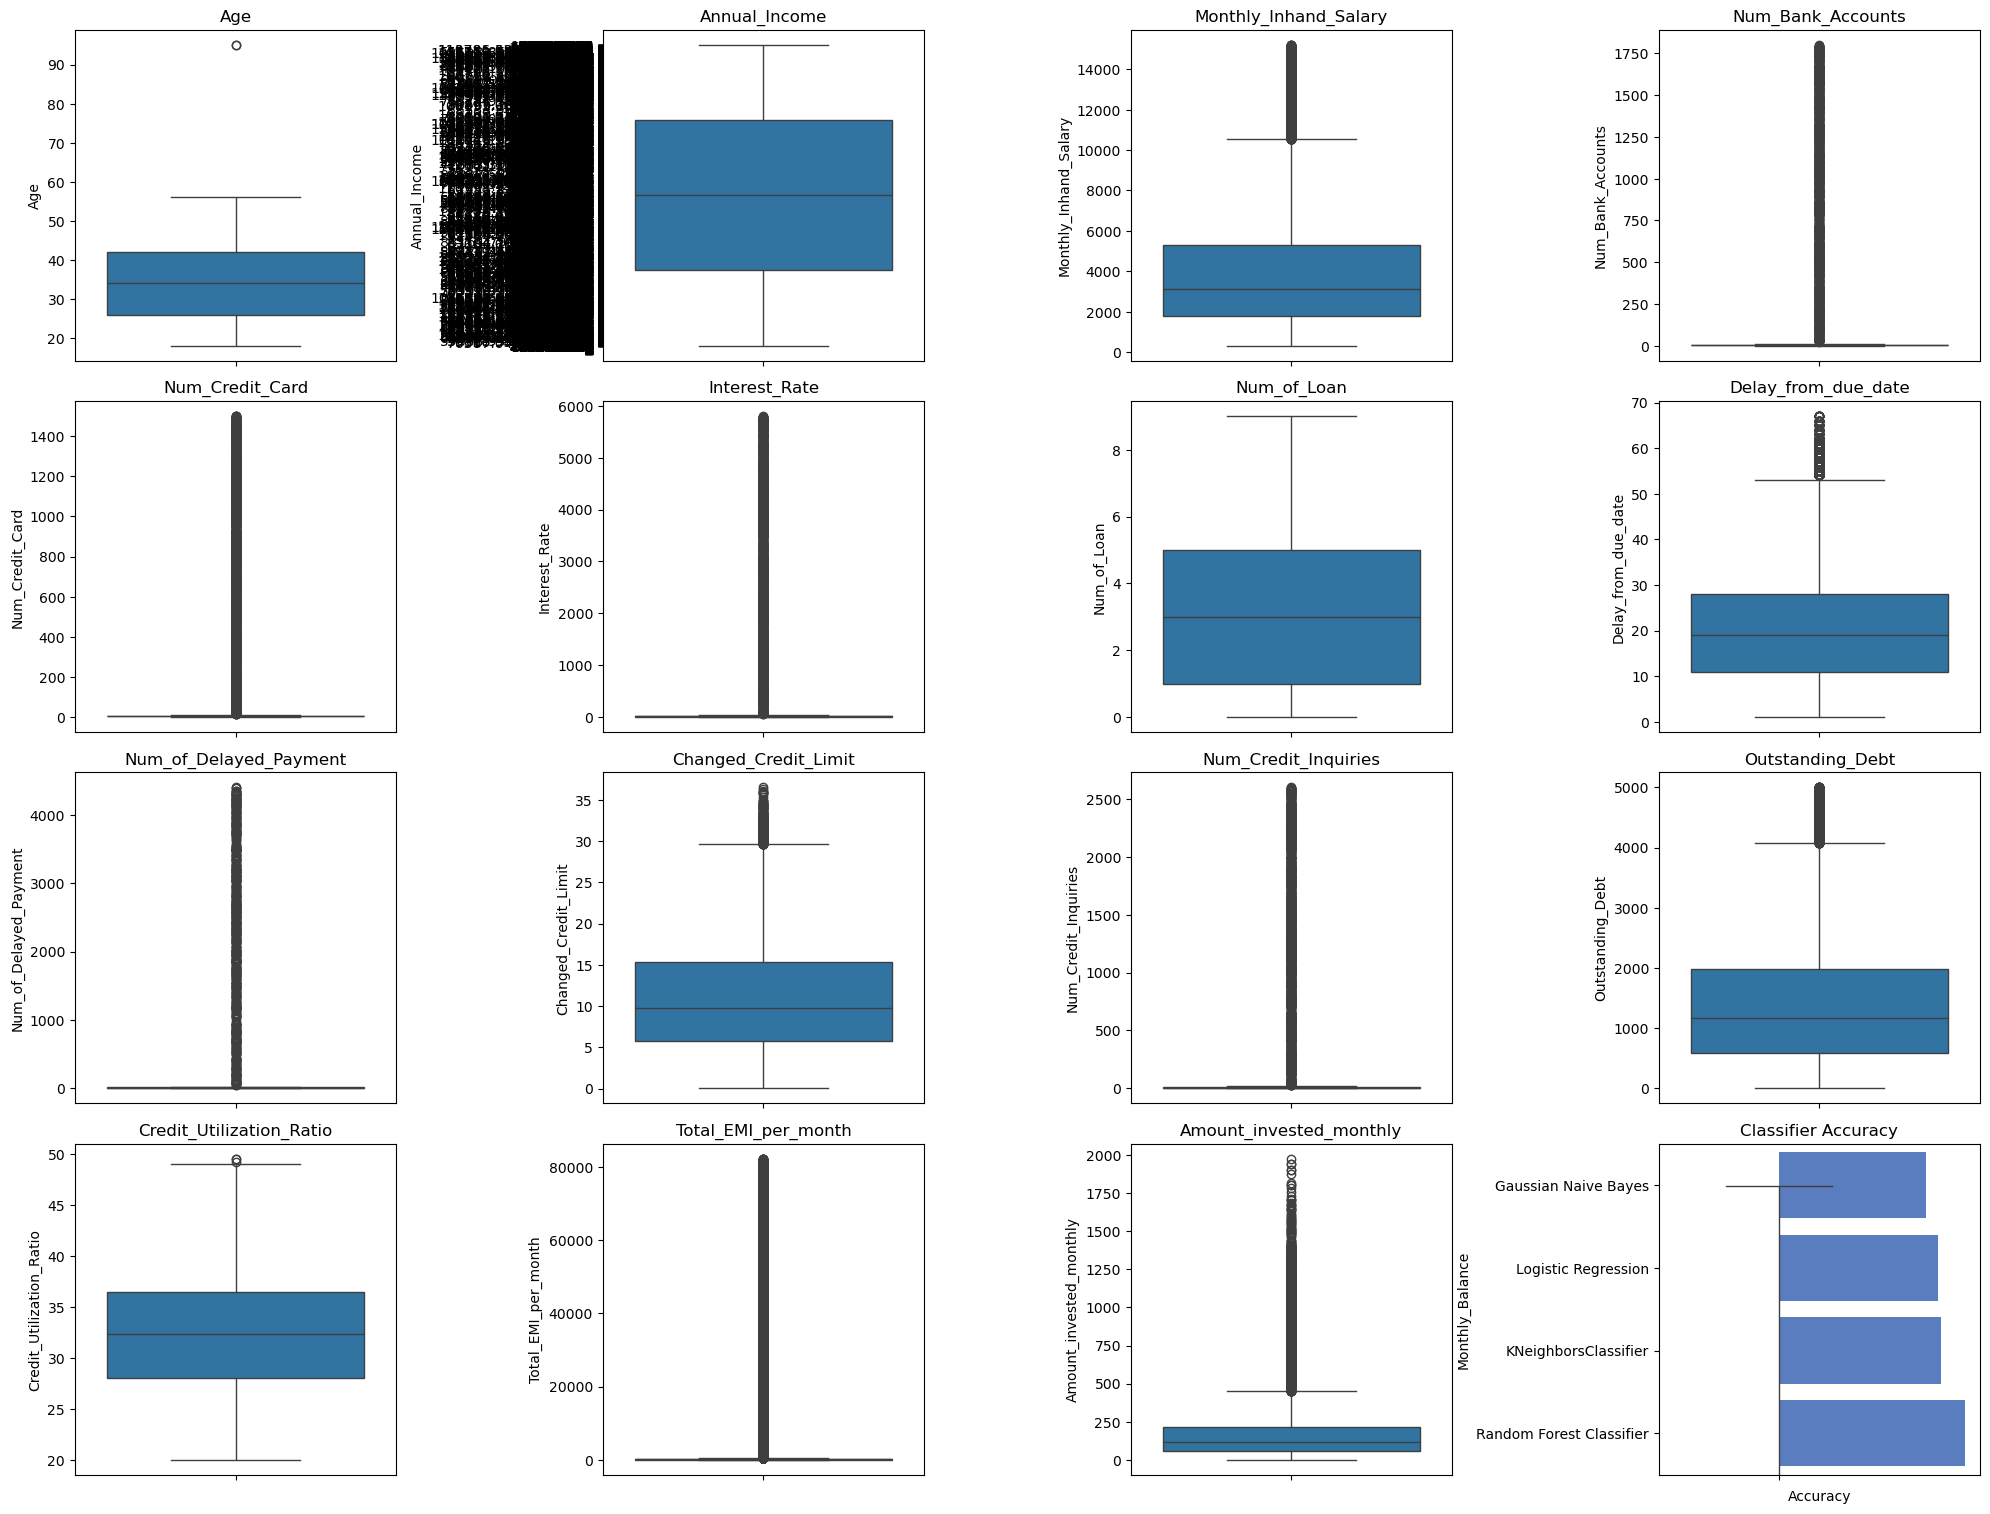

In [1049]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");
plt.show()

In [1050]:
# измерение производительности
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [1051]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[    0,     0,  3466],
       [    0,     0,  6488],
       [    0,     0, 11968]], dtype=int64)

### Визуализация

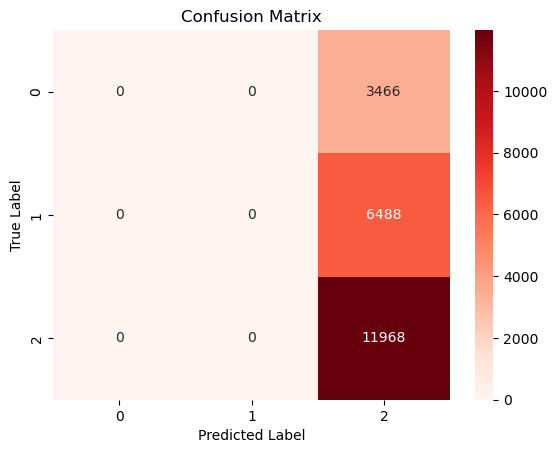

In [1053]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

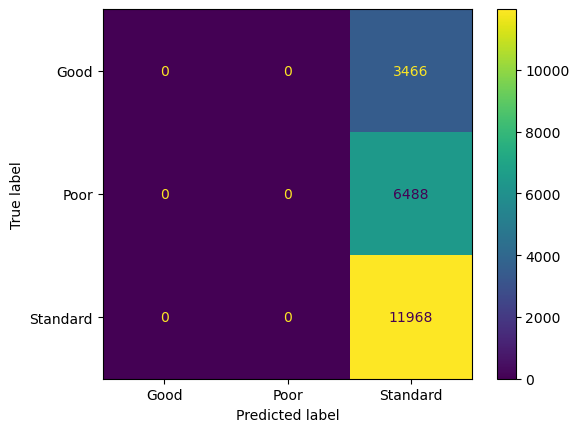

In [1058]:
cm = confusion_matrix(y_test, y_test_predict, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [1060]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.5500258386321253
test accuracy:  0.5459355898184473
